In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from posixpath import sep
df = pd.read_csv('25152746-spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
df.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [9]:
df['label'].value_counts() / len(df)

,count
label,
ham,0.865937
spam,0.134063


In [10]:
ham = df[df['label'] == 'ham']
ham.shape

(4825, 4)

In [11]:
spam = df[df['label'] == 'spam' ]
# spam.shape
spam.shape[0]

747

In [12]:
ham = ham.sample(spam.shape[0])


In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
data = pd.concat([ham, spam], axis=0)

In [15]:
# data.shape
data.value_counts('label')

,count
label,
ham,747
spam,747


In [16]:
longest_index = data[data['label'] == 'ham']['length'].max() #790
longest_msg = data[data['length'] == 790]['message']


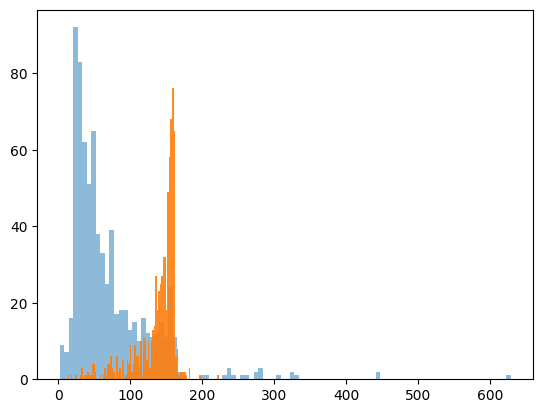

In [17]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha= 0.5)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha= 0.9)
plt.show()

In [18]:
data = data.reset_index()

In [19]:
data.shape

(1494, 5)

In [20]:
data.head()


,index,label,message,length,punct
0,4128,ham,"Sorry, I'll call later",22,2
1,334,ham,Any chance you might have had with me evaporat...,232,4
2,4645,ham,Did u got that persons story,28,0
3,1722,ham,Am watching house – very entertaining – am get...,136,1
4,2636,ham,Tiwary to rcb.battle between bang and kochi.,44,2


In [21]:
data.drop('index', axis=1)

,label,message,length,punct
0,ham,"Sorry, I'll call later",22,2
1,ham,Any chance you might have had with me evaporat...,232,4
2,ham,Did u got that persons story,28,0
3,ham,Am watching house – very entertaining – am get...,136,1
4,ham,Tiwary to rcb.battle between bang and kochi.,44,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [22]:
data.shape
data.columns

Index(['index', 'label', 'message', 'length', 'punct'], dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [25]:
X_train.shape

(1045,)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [27]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [28]:
classifier.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
Y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [32]:
accuracy_score(Y_test, y_pred)

0.9510022271714922

In [33]:
confusion_matrix(Y_test, y_pred)

array([[223,   4],
       [ 18, 204]])

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [35]:
from sklearn.svm import SVC

In [36]:
svm = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C=100, gamma='auto'))])

In [37]:
svm.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [38]:
y_pred = svm.predict(X_test)

In [39]:
accuracy_score(Y_test, y_pred)

0.9420935412026726

In [40]:
confusion_matrix(Y_test, y_pred)

array([[218,   9],
       [ 17, 205]])

In [41]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.94       227
        spam       0.96      0.92      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [43]:
#Spam checking with Random Forest
def spam_check_rf(msg):
    return classifier.predict(msg)

#Spam checking with SVM
def spam_check_svm(msg):
    return svm.predict(msg)

In [50]:
test_msg = 'hi, how are you? what have you been to? have you done the assignment?'
print(spam_check_rf(test_msg))
print(spam_check_svm(test_msg))

test_msg2 = 'Congratulations, you are the lucky winner of $2 million dollars. in order to claim your prize call 99999'
print(spam_check_rf(test_msg2))
print(spam_check_svm(test_msg2))


['ham']
['ham']
['spam']
['spam']
